## Data Analysis of Asana Rebel's November Marketing Campaigns 

                            Alejandra Budar


.

#### Contents:

I. Analysis of the 2 web campaigns

II. Analysis of the 3 app campaigns

III. Analysis of the overall performance of web vs. app campaigns

IV. Customer segmentation using machine learning 

V. Final recommendations 

.

### I. Analysis of Web Campaigns 

Here, I am merely opening and changing the data type of certain columns to prepare for the analysis that follows.

In [464]:
web_installs3= pd.read_csv('/Users/alejandrabudar/Downloads/web_installs3.csv')
web_installs3.install_timestamp = pd.to_datetime(web_installs3.install_timestamp)
web_installs3.session_started_timestamp = pd.to_datetime(web_installs3.session_started_timestamp)
web_installs3

,campaign_name,sk_user,install_timestamp,sk_web_user,session_id,session_started_timestamp
0,web_campaign_world,5725231534,2020-11-25 08:29:44,7805472,b5acd949-b231-49ef-8123-f37866e73766,2020-11-25 08:21:31
1,web_campaign_world,5725235203,2020-11-23 21:00:41,7732928,3a0081fe-8eca-4d6d-8d57-2002fe5a558e,2020-11-23 20:42:08
2,web_campaign_world,5725781810,2020-11-24 05:58:23,7753767,24af3e7c-e205-4d79-9872-3cb6cd4c26a3,2020-11-24 05:53:08
3,web_campaign_world,5727750686,2020-11-24 08:55:02,7766318,d67858d2-fb10-400c-b5c6-a68eaecbf952,2020-11-24 08:46:36
4,web_campaign_world,5729974504,2020-11-22 22:13:03,5759074,59d664a5-ff5b-4c67-87be-7b5bbf8d79c4,2020-11-22 22:06:35
...,...,...,...,...,...,...
1010,web_campaign_world_promo,88392840,2020-11-27 20:27:28,7864335,3a28c627-c7f9-4eb0-be8c-bac61a79ac3b,2020-11-27 20:10:40
1011,web_campaign_world_promo,88598345,2020-11-28 07:31:20,7897403,fa4a1cc6-632e-4101-b61c-776b2d905e8a,2020-11-28 07:24:11
1012,web_campaign_world_promo,944805144,2020-11-28 10:42:27,7892528,d1d5a891-45a4-4663-be96-a31cde53360e,2020-11-28 10:35:01
1013,web_campaign_world_promo,992758661,2020-11-27 09:23:36,7861783,af0f3909-7d32-40bd-a4dc-7babbd04b331,2020-11-27 09:08:49


In [211]:
import pandas as pd

web_spend= pd.read_csv('/Users/alejandrabudar/Downloads/web_spend.csv')
web_spend

,campaign_name,spend_date,impressions,spend
0,web_campaign_world,2020-11-19 00:00:00,212329,401
1,web_campaign_world,2020-11-26 00:00:00,901318,6082
2,web_campaign_world,2020-11-21 00:00:00,622741,3776
3,web_campaign_world_promo,2020-11-29 00:00:00,939889,8696
4,web_campaign_world_promo,2020-11-28 00:00:00,690705,7460
5,web_campaign_world,2020-11-30 00:00:00,656480,4392
6,web_campaign_world,2020-11-28 00:00:00,1354546,11454
7,web_campaign_world,2020-11-18 00:00:00,440435,1626
8,web_campaign_world_promo,2020-11-27 00:00:00,382632,6649
9,web_campaign_world_promo,2020-11-26 00:00:00,208110,2891


.

I first began by analyzing whether there was a correlation between the amount spent on the web campaigns and the number of impressions achieved. Below, we can see that there is a generally positive association between the two variables: as the amount spent increases, so does the number of impressions and vice-versa. However, there are a few instances where more money was spent and less impessions achieved. Minimizing these outliers (low performing campaigns) will be essential to maximizing ROI.

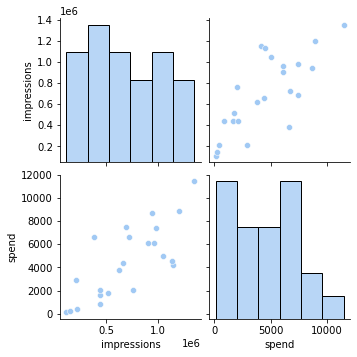

In [671]:
sns.pairplot(web_spend)

Next, I familiarized myself with the general context of each individual campaign. Below I answered the following question:
 1) How many days did the campaigns run for?
 
 2) How much was spent for each campaign?
 
 3) How much was spent per day for each campaign?
 
 4) How many conversions did each campaign generate?





### 1

In [616]:
num_of_days= web_spend['campaign_name'].value_counts(ascending=False).to_frame().reset_index()
num_of_days.rename(columns={"index": "Name of Campaign", "campaign_name": "Length of Campaign (Days)"})


,Name of Campaign,Length of Campaign (Days)
0,web_campaign_world,18
1,web_campaign_world_promo,5


### 2

In [590]:
total_spent= web_spend.groupby('campaign_name')[['spend']].sum().reset_index()
total_spent.rename(columns={"campaign_name": "Name of Campaign", "spend": "Total Amount Spent (Euros)"})

,Name of Campaign,Total Amount Spent (Euros)
0,web_campaign_world,70992
1,web_campaign_world_promo,32365


### 3

In [589]:
avg_spent_per_day= web_spend.groupby('campaign_name')[['spend']].mean().reset_index()
avg_spent_per_day.rename(columns={"campaign_name": "Name of Campaign", "spend": "Avg Amount Spent/Day (Euros)"})

,Name of Campaign,Avg Amount Spent/Day (Euros)
0,web_campaign_world,3944
1,web_campaign_world_promo,6473


### 4

In [891]:
campaign_conversion = web_installs3.groupby('campaign_name')[['sk_user']].nunique().apply(lambda x: x.sort_values(ascending=False)).reset_index()
campaign_conversion.rename(columns={"campaign_name": "Name of Campaign", "sk_user": "Num of Conversions"})

,Name of Campaign,Num of Conversions
0,web_campaign_world,550
1,web_campaign_world_promo,171


.

After establishing a basic analytical understanding of the campaigns, I took the above information and used it to calculate the cost per action (CPA) for every install obtained from each campaign. Here we see that despite having a lower total amount spent on the Web Campaign World Promo Campaign, it was 32% more expensive in terms of CPA.  

In [613]:
print('CPA -- cost per action (€ /intall)')
print ('')
print('Web Campaign World:', total_spent.spend.div(campaign_conversion.sk_user)[0].round(2)) 
print('Web Campaign World Promo:', total_spent.spend.div(campaign_conversion.sk_user).round(2)[1])


CPA -- cost per action (€ /intall)

Web Campaign World: 129.08
Web Campaign World Promo: 189.27


.

Assuming a 1:1 relationship between the number of unique users and the number of  installs, so only 1 install per each new user, I calculated the average number of installs per day. This was interesting because despite having lasted only 5 days and having a higher CPA, Web Campaign World Promo performed better in this metric than Web Campaign World.

In [620]:
print('Avg. Installs per day:')
print ('')
print('Web Campaign World:', campaign_conversion.sk_user.div(num_of_days.campaign_name)[0].round(2))
print('Web Campaign World Promo:', campaign_conversion.sk_user.div(num_of_days.campaign_name)[1])

Avg. Installs per day:

Web Campaign World: 30.56
Web Campaign World Promo: 34.2


.

I then decided to analyze the web sessions data.

I first analyzed the number of web sessions it took before a user finally installed the app. As we can see below, the majority of users download the app after only one session, however, there are still some that take longer.

Median num of sessions / sk_user    1.0
dtype: float64


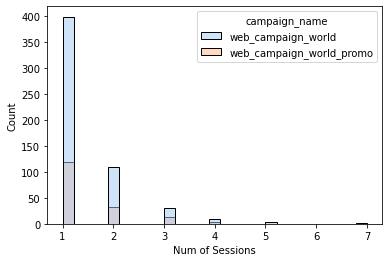

In [670]:
import seaborn as sns

df1=web_installs3.groupby(['campaign_name', 'sk_user'],as_index=False)[['sk_user']].count()
sns.histplot(data=df1, x= 'sk_user', hue='campaign_name')
plt.xlabel("Num of Sessions")
print( 'Median num of sessions /' , num_of_sessions.median())


.

Furthermore, I  then utilized the columns 'session_started_timestamp' and 'install_timesamp' to calculate the amount of time between the beginning of the session and when the user actually downloaded the app. The total can be seen in the column 'time_elapsed'. However, to make it easier for calculations I rounded the duration to the nearest minute and placed the value in the column 'time_elapsed_mins'. 

In [466]:
web_installs3['time_elapsed_mins'] = (web_installs3.time_elapsed.dt.seconds/60).round(0)
web_installs3

,campaign_name,sk_user,install_timestamp,sk_web_user,session_id,session_started_timestamp,time_elapsed,time_elapsed_mins
0,web_campaign_world,5725231534,2020-11-25 08:29:44,7805472,b5acd949-b231-49ef-8123-f37866e73766,2020-11-25 08:21:31,0 days 00:08:13,8.0
1,web_campaign_world,5725235203,2020-11-23 21:00:41,7732928,3a0081fe-8eca-4d6d-8d57-2002fe5a558e,2020-11-23 20:42:08,0 days 00:18:33,19.0
2,web_campaign_world,5725781810,2020-11-24 05:58:23,7753767,24af3e7c-e205-4d79-9872-3cb6cd4c26a3,2020-11-24 05:53:08,0 days 00:05:15,5.0
3,web_campaign_world,5727750686,2020-11-24 08:55:02,7766318,d67858d2-fb10-400c-b5c6-a68eaecbf952,2020-11-24 08:46:36,0 days 00:08:26,8.0
4,web_campaign_world,5729974504,2020-11-22 22:13:03,5759074,59d664a5-ff5b-4c67-87be-7b5bbf8d79c4,2020-11-22 22:06:35,0 days 00:06:28,6.0
...,...,...,...,...,...,...,...,...
1010,web_campaign_world_promo,88392840,2020-11-27 20:27:28,7864335,3a28c627-c7f9-4eb0-be8c-bac61a79ac3b,2020-11-27 20:10:40,0 days 00:16:48,17.0
1011,web_campaign_world_promo,88598345,2020-11-28 07:31:20,7897403,fa4a1cc6-632e-4101-b61c-776b2d905e8a,2020-11-28 07:24:11,0 days 00:07:09,7.0
1012,web_campaign_world_promo,944805144,2020-11-28 10:42:27,7892528,d1d5a891-45a4-4663-be96-a31cde53360e,2020-11-28 10:35:01,0 days 00:07:26,7.0
1013,web_campaign_world_promo,992758661,2020-11-27 09:23:36,7861783,af0f3909-7d32-40bd-a4dc-7babbd04b331,2020-11-27 09:08:49,0 days 00:14:47,15.0


During my chat with Max, he mentioned that one of the responsibilities of the position is to identify anomalies within  data. I tried to keep that in mind throughout this analysis and it was during this part of the analysis that I found a discrepancy in the data. Discrepencies such as this one are important to identify since they can suggest bugs that can impact the accuracy of future analysis and create misleading data. 

If you scroll to the bottom of the above table, you will find that rows 1013 and 1014 refer to the same person, with the id of 992758661, however, this person has 2 sessions attributed to the same installation. In the first session, his/her session length is 15 minutes while their second session lasts 1,241 minutes. I'm not sure what platform was used or how the data was collected, but it appears to be susceptible to issues with multiple tabs or windows. 

Based on this, I would recommend to monitor the data to see if it was a one-time glitch or if it is a persistant issue in the way campaign data is captured. If the issue is reoccurring, a flagging system could be created via python. The system could involve the following steps:
1. Calculating the time elapsed during a session (like in column 'time_elapsed_mins')
2. Determining a max session duration (let's say 3 hours) for flagging purposes
3. Having python return the index of the row that was flagged (because it was greater than 3 hours) 
4. Manually review the flagged rows and determine appropriate steps (deletion or not)

.

Now back to the analysis. Next, I reviewed the distribution of the variable 'time_elapsed_mins' previously calculated between the beginning of a session and the installation. The graph below shows that the majority of the users are in the first bin, but the variable varies greatly. The glitch previously mentioned can be seen in the last spike between 1200 and 1400 minutes.

<AxesSubplot:xlabel='time_elapsed_mins', ylabel='Count'>

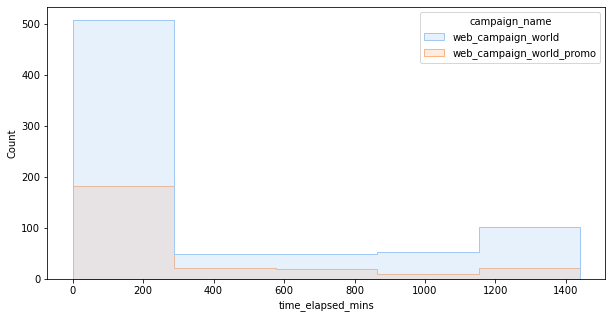

In [637]:
fig, ax = pyplot.subplots(figsize=(10, 5))
sns.histplot(data=web_installs3, x="time_elapsed_mins", hue="campaign_name",  element="step", bins=5)


To obtain a better understanding, I looked at the statistics behind the combined data since they followed a similar trend. As we can see, there is a high standard deviation so the mean is not so helpful here. The median is a much better indicator of the time elapsed that most users experience. Ultimately, the median was 19 minutes, which is quite high. Reducing this number is important in order to decrease the number of people falling out of the funnel. 

Additionally, the other statistics show that the minimum was 0, meaning that some users waste no time in downloading the app, while the first quartile of users spend an average of 7 minutes before downloading. 

In [405]:
web_installs3.time_elapsed_mins.describe().round(2)

count    1015.00
mean      322.60
std       478.06
min         0.00
25%         7.00
50%        19.00
75%       577.50
max      1440.00
Name: time_elapsed_mins, dtype: float64

In [638]:
print( 'The median time elapsed :', web_installs3.time_elapsed_mins.median(), 'minutes')

The median time elapsed : 19.0 minutes


.

Furthermore, I looked at the distribution of installs throughout the day. Below, we can see that the highest number of installations for Web Campaign World were in the morning, around 7 am and then again between 15:00 and 19:00. This correlates with the idea that most people go on social media during their morning commmutes and then again after work. 

For the Web Campaign World Promo, the distribution was a bit more sporadic. There are about 3 main waves for this campaign: from 5 to 10 am, 11 am to 1 pm and from 5 pm to 11pm. Of course, a correlation is difficult to establish since the campaign only lasted 5 days and there could be numerous other confounding variables that can cause such spikes. However, a potential explanation for the pattern is that it mimics the same reasoning as the Web Campaign World, morning commutes and the ending of work, while also including a meal/lunch break when people may also engage in their social media.   

Text(0, 0.5, 'Number of installations')

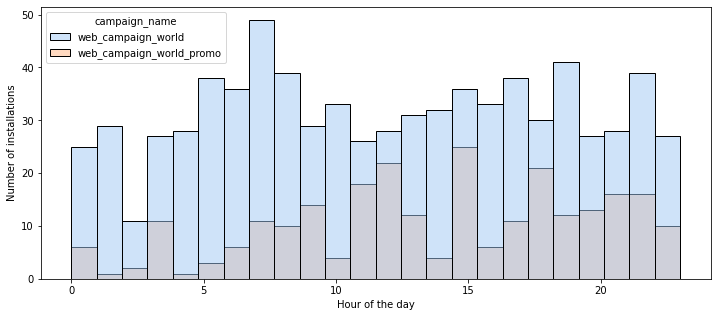

In [567]:
sns.set_palette("pastel",3)
fig, ax = pyplot.subplots(figsize=(12, 5))
sns.histplot(data=web_installs3, x=web_installs3["install_timestamp"].dt.hour, hue="campaign_name", bins=24 )
plt.xlabel("Hour of the day")
plt.ylabel("Number of installations")


.

When the number of installations is broken down by day, we get the following chart.

In [320]:
df=web_installs2.groupby(['campaign_name', 'install_timestamp'])[['install_timestamp']].count()
df.columns = ['count']
df

count
campaign_name            install_timestamp       
web_campaign_world       2020-11-14            30
                         2020-11-15            16
                         2020-11-16            17
                         2020-11-17            21
                         2020-11-18            33
                         2020-11-19            12
                         2020-11-20             2
                         2020-11-21            24
                         2020-11-22            67
                         2020-11-23            51
                         2020-11-24            73
                         2020-11-25            79
                         2020-11-26            52
                         2020-11-27            87
                         2020-11-28            74
                         2020-11-29            57
                         2020-11-30            65
web_campaign_world_promo 2020-11-26            21
                         2020-11-27            52
                         2020-11-28            47
                         2020-11-29            67
                         2020-11-30            68

The above information can be used in preparation for next year's campaign.

In the dates of Web Campaign World, for example, we can see that beginning on the 22nd and onward, the number of installations is consistently over 50 and ends on the 30th at 65. Based on this data, I would suggest shifting the dates of this particular campaign by a week, starting around the 21st instead of the 14th and then extending the end date into December, around the 7th. 

As for the Web Campaign World Promo, I would suggest extending the dates, since the last day of the campaign, the 30th, was also its highest number of installs. Extending the campaign would allow Asana Rebel to better capitalize on lost opportunities.  



.

Next, I combined the sessions data with the amount of revenue generated. However, since users can have multiple sessions, this creates duplicated revenue data. To combat this, I filtered the sk_user column for unique ids only. After doing so, 243 rows were removed.

In [998]:
web_installs4= pd.read_csv('/Users/alejandrabudar/Downloads/web_installs4.csv')
web_installs4.install_timestamp = pd.to_datetime(web_installs4.install_timestamp)
web_installs4.session_started_timestamp = pd.to_datetime(web_installs4.session_started_timestamp)
web_installs4['time_elapsed'] = ((web_installs4["install_timestamp"].to_numpy()) - (web_installs4["session_started_timestamp"].to_numpy()))
web_installs4['time_elapsed_mins'] = (web_installs4.time_elapsed.dt.seconds/60).round(0)
web_installs4

,campaign_name,sk_user,install_timestamp,session_started_timestamp,revenue,time_elapsed,time_elapsed_mins
0,web_campaign_world,5760718740,2020-11-26 10:44:07,2020-11-26 04:27:30,25.01,0 days 06:16:37,377.0
1,web_campaign_world_promo,5760787444,2020-11-26 15:58:23,2020-11-26 15:57:10,28.26,0 days 00:01:13,1.0
2,web_campaign_world,5759581305,2020-11-18 09:20:48,2020-11-18 09:16:25,10.97,0 days 00:04:23,4.0
3,web_campaign_world,5759397241,2020-11-17 15:41:01,2020-11-17 15:33:19,12.38,0 days 00:07:42,8.0
4,web_campaign_world,83182063,2020-11-27 07:25:33,2020-11-27 06:54:20,26.79,0 days 00:31:13,31.0
...,...,...,...,...,...,...,...
756,web_campaign_world,5760793376,2020-11-26 17:07:45,2020-11-25 05:05:47,28.16,1 days 12:01:58,722.0
757,web_campaign_world,5760720497,2020-11-30 05:35:57,2020-11-26 06:31:45,23.77,3 days 23:04:12,1384.0
758,web_campaign_world_promo,5761105936,2020-11-28 11:43:50,2020-12-08 10:40:00,27.51,-10 days +01:03:50,64.0
759,web_campaign_world,5750444109,2020-11-23 23:37:27,2020-08-30 00:42:01,25.91,85 days 22:55:26,1375.0


In [1026]:
unique_web_users= web_installs4.drop_duplicates('sk_user')

,campaign_name,sk_user,install_timestamp,session_started_timestamp,revenue,time_elapsed,time_elapsed_mins
0,web_campaign_world,5760718740,2020-11-26 10:44:07,2020-11-26 04:27:30,25.01,0 days 06:16:37,377.0
1,web_campaign_world_promo,5760787444,2020-11-26 15:58:23,2020-11-26 15:57:10,28.26,0 days 00:01:13,1.0
2,web_campaign_world,5759581305,2020-11-18 09:20:48,2020-11-18 09:16:25,10.97,0 days 00:04:23,4.0
3,web_campaign_world,5759397241,2020-11-17 15:41:01,2020-11-17 15:33:19,12.38,0 days 00:07:42,8.0
4,web_campaign_world,83182063,2020-11-27 07:25:33,2020-11-27 06:54:20,26.79,0 days 00:31:13,31.0
...,...,...,...,...,...,...,...
739,web_campaign_world,5760242238,2020-11-22 11:25:35,2020-11-22 11:21:44,25.59,0 days 00:03:51,4.0
740,web_campaign_world,5754426004,2020-11-28 21:20:34,2020-11-28 21:14:48,21.72,0 days 00:05:46,6.0
751,web_campaign_world,5760952334,2020-11-27 17:05:47,2020-11-27 16:55:26,29.62,0 days 00:10:21,10.0
755,web_campaign_world,5760071629,2020-11-27 00:08:20,2020-11-27 00:03:35,28.05,0 days 00:04:45,5.0


Here I decided I would look for a relationship between the amount of time elapsed and the amount of revenue, so then I began to remove the columns that I wouldn't need.

In [993]:
#ignore warning

unique_web_users.drop(['sk_user', 'install_timestamp', 'session_started_timestamp', 'time_elapsed'], axis=1, inplace= True)


/Applications/anaconda3/envs/mainenv/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


.

Below, the variables revenue and time_elapsed_mins are plotted against each other. 

The top left shows us the distribution of revenue. It is rightly skewed, which is good since it means most campaigns are on the higher end of the revenue scale. 

The bottom right graph is the same to the one previously plotted, showing the distribution of the time elapsed, with the majority of people falling within the first bin. 

In the top right, we see that as time increases, revenue plateaus. The bottom left shows this same relationship. I was interested in exploring this relationship and decided to "zoom in" on the first hour of the data. The zoomed in version of the graph can be found below. 


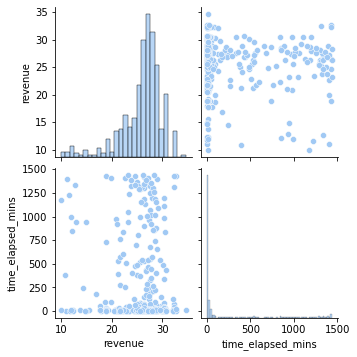

In [994]:
sns.pairplot(unique_web_users)

The graph below highlights that the first 10 minutes of a session are crucial. This suggests that for the users who clicked the ad but did not download the app, it could be because they were not convinced within the first 10 minutes. This period of time has the steepest slope (fastest rate of increase in revenue) and provides the greatest window of opportunity to increase the amount spent by the user.

(0.0, 60.0)

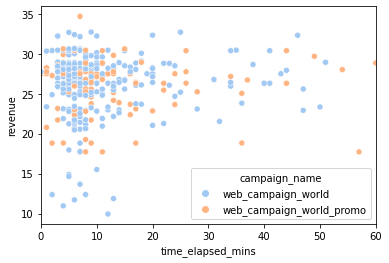

In [995]:
sns.scatterplot(data=unique_web_users, x="time_elapsed_mins", y="revenue", hue="campaign_name")
plt.xlim(0,60) 

### II. Analysis of App Campaigns

Here I am just opening the two csv files that I will be using for the analysis. It is important to note that I encountered a technical issue when downloading the second file below (app_installs), hence why there are numerous null values in the sk_user column. However, since I did not need the specific IDs and I knew that the sk_user column was the primary key and all numbers in that column must be unique entries (so no chance of duplicates), I decided not to drop those rows and included them in the analysis. 

In [765]:
app_spend= pd.read_csv('/Users/alejandrabudar/Downloads/app_spend.csv')
app_spend

,campaign_name,spend_date,impressions,spend
0,android_campaign_world,2020-11-23 00:00:00,647888,1238
1,ios_campaign_world,2020-11-23 00:00:00,1120194,3691
2,ios_campaign_north_america,2020-11-08 00:00:00,124710,1168
3,android_campaign_world,2020-11-06 00:00:00,458696,1236
4,ios_campaign_world,2020-11-30 00:00:00,231860,635
...,...,...,...,...
82,ios_campaign_north_america,2020-11-16 00:00:00,155855,1680
83,ios_campaign_north_america,2020-11-05 00:00:00,79787,698
84,ios_campaign_north_america,2020-11-17 00:00:00,305051,3593
85,ios_campaign_north_america,2020-11-22 00:00:00,420671,6419


In [862]:
app_installs=pd.read_csv('/Users/alejandrabudar/Downloads/total_app_installs.csv')
app_installs.install_timestamp = pd.to_datetime(app_installs.install_timestamp)
app_installs

,sk_user,install_timestamp,campaign_name
0,NaN,2020-11-01 00:15:45,android_campaign_world
1,NaN,2020-11-01 01:07:36,android_campaign_world
2,NaN,2020-11-01 01:21:58,android_campaign_world
3,NaN,2020-11-01 02:05:22,ios_campaign_world
4,NaN,2020-11-01 02:16:03,android_campaign_world
...,...,...,...
128592,88824166.0,2020-11-05 14:23:21,ios_campaign_world
128593,88869582.0,2020-11-17 12:23:26,ios_campaign_world
128594,88884848.0,2020-11-03 02:06:01,ios_campaign_world
128595,924019510.0,2020-11-24 20:38:19,ios_campaign_north_america


.

Again, I tried to obtain a general sense for how the app campaigns performed by first establishing a relationship between the amounts spent and the impressions achieved. In comparison to the web campaigns, the relationship appeared more linear, showing that the majority of the campaigns performed as expected: as the amount spent increased, so did the number of impressions.

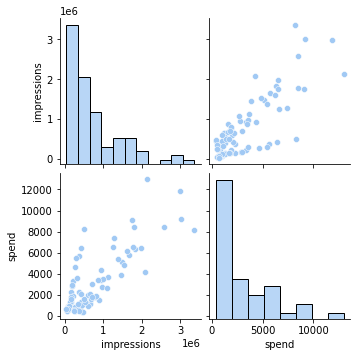

In [766]:
sns.pairplot(app_spend)

Next I answered the following questions:

 1) How many days did the campaigns run for?
 
 2) How much was spent for each campaign?
 
 3) How much was spent per day for each campaign?
 
 4) How many conversions did each campaign generate?
 
 5) What was the average number of installations per day per campaign?


.

### 1

In [847]:
num_of_app_days= app_spend['campaign_name'].value_counts().to_frame().reset_index()
num_of_app_days.rename(columns={"index": "Name of Campaign", "campaign_name": "Length of Campaign (Days)"}).sort_values(by= 'Name of Campaign')


,Name of Campaign,Length of Campaign (Days)
1,android_campaign_world,30
2,ios_campaign_north_america,27
0,ios_campaign_world,30


### 2

In [775]:
total_app_spent= app_spend.groupby('campaign_name')[['spend']].sum().reset_index()
total_app_spent.rename(columns={"campaign_name": "Name of Campaign", "spend": "Total Amount Spent (Euros)"}).sort_values(by= 'Name of Campaign')

,Name of Campaign,Total Amount Spent (Euros)
0,android_campaign_world,48217
1,ios_campaign_north_america,63239
2,ios_campaign_world,155666


### 3

In [771]:
app_avg_spent_per_day= app_spend.groupby('campaign_name')[['spend']].mean().reset_index()
app_avg_spent_per_day.rename(columns={"campaign_name": "Name of Campaign", "spend": "Avg Amount Spent/Day (Euros)"}).round(2)

,Name of Campaign,Avg Amount Spent/Day (Euros)
0,android_campaign_world,1607.23
1,ios_campaign_north_america,2342.19
2,ios_campaign_world,5188.87


### 4

In [888]:
campaign_conversion1 = app_installs.groupby('campaign_name')[['sk_user']].count().reset_index()
campaign_conversion1.rename(columns={"campaign_name": "Name of Campaign", "sk_user": "Num of Conversions"})

,Name of Campaign,Num of Conversions
0,android_campaign_world,69811
1,ios_campaign_north_america,6947
2,ios_campaign_world,49945


### 5

In [854]:
print('Avg. Installs per day:')
print ('')
print('Android Campaign World:  2,327' )
print('IOS Campaign North America: 257' )
print('IOS Campaign World:   1,665', )

Avg. Installs per day:

Android Campaign World:  2,327
IOS Campaign North America: 257
IOS Campaign World:   1,665


.

Below, the CPA was calculated per campaign. IOS Campaign North America was the most costly and performed significantly lower in the number of conversions and, subsequently the CPA, than the other 2 campaigns.

In [805]:
print('CPA -- cost per action (€ /intall)')
print ('')
print('Android Campaign World:', total_app_spent.spend.div(campaign_conversion1.sk_user)[0].round(2) ) 
print('IOS Campaign North America:', total_app_spent.spend.div(campaign_conversion1.sk_user).round(2)[1])
print('IOS Campaign World:', total_app_spent.spend.div(campaign_conversion1.sk_user).round(2)[2])


CPA -- cost per action (€ /intall)

Android Campaign World: 0.69
IOS Campaign North America: 9.1
IOS Campaign World: 3.12


.

Furthermore, I utilized the column install_timestamp to plot the time of each install per campaign. We can see that all campaigns had a bimodal distribution (two peaks). The Android World Campaign and IOS World Campaign followed the same bimodal distribution with one peak between midnight to 4 am and another from around noon to 8pm, while the IOS North America Campaign's peaks were midnight to 5 am and 1 pm to midnight. 

This suggests that advertisements that are displayed in the morning and in the late afternoon to evening will perform best. 

Text(0, 0.5, 'Number of installations')

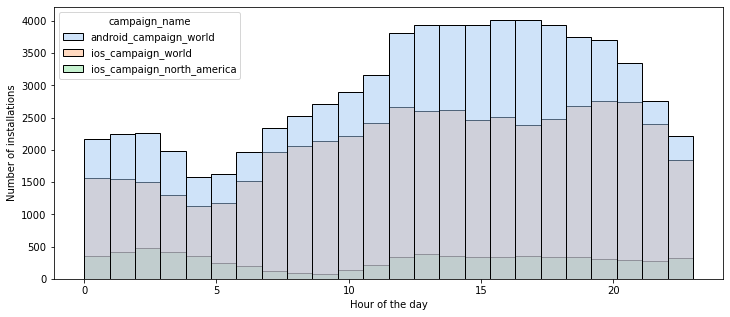

In [863]:
sns.set_palette("pastel",3)
fig, ax = pyplot.subplots(figsize=(12, 5))
sns.histplot(data=app_installs, x=app_installs["install_timestamp"].dt.hour, hue="campaign_name", bins=24 )
plt.xlabel("Hour of the day")
plt.ylabel("Number of installations")


.

Moreover, I looked to see if there were trends between the day of the month and the number of installs for that day. What I found interesting here is that, unlike the web sessions, there were no large peaks around Black Friday. For the Android World Campaign and IOS World Campaign, their highest peaks were actually in the first half of the month, while the IOS North American Campaign peaked around November 19th. This could be related to the fact that most people utilize their web browsers when shopping on Black Friday since it allows them to have numerous tabs and windows open to monitor different products. Based on this, I would suggest further analysis and internal discussion on the spend variable for the app campaigns during this time. It might be worth considering the lowering of the amount spent on app campaigns for black friday and investing that into web campaigns instead, for example. 

In [877]:
df=app_installs.groupby(['campaign_name', 'install_timestamp'])[['install_timestamp']].count()
df.columns = ['count']
df.reset_index(inplace=True)
df

,campaign_name,install_timestamp,count
0,android_campaign_world,1,9696
1,android_campaign_world,2,9497
2,android_campaign_world,3,3214
3,android_campaign_world,4,3011
4,android_campaign_world,5,2090
...,...,...,...
85,ios_campaign_world,26,758
86,ios_campaign_world,27,445
87,ios_campaign_world,28,583
88,ios_campaign_world,29,791


Text(0, 0.5, 'Number of installations')

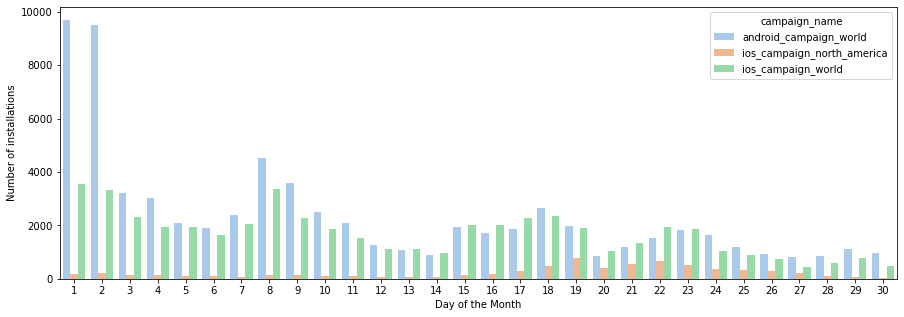

In [881]:
fig, ax = pyplot.subplots(figsize=(15, 5))
ax = sns.barplot(x="install_timestamp", y="count", data=df, hue= 'campaign_name')
plt.xlabel("Day of the Month")
plt.ylabel("Number of installations")


.

In the section below, I introduced the "revenue" variable into the data as well as the time elapsed between the installation of the app and what time the user made a purchase. What surprised me was the number of people who actually made a purchase during the campaigns. I was so surprised that I re-checked and re-wrote the SQL code 5 different times. However, despite my attempts, everytime I filtered by the network ('Instagram & Facebook') and the dates of November for both the install_timestamp and purchased_at variables, the output was still a total of 14.

After my brief state of confusion, I continued on with the analysis and calculated the amount of time that passed from the time of installation and the time of purchase.

In [1003]:
app_installs_and_revenue= pd.read_csv('/Users/alejandrabudar/Downloads/app_installs_and_revenue.csv')
app_installs_and_revenue.install_timestamp = pd.to_datetime(app_installs_and_revenue.install_timestamp)
app_installs_and_revenue.purchased_at = pd.to_datetime(app_installs_and_revenue.purchased_at)
app_installs_and_revenue['time_elapsed'] = ((app_installs_and_revenue["purchased_at"].to_numpy()) - (app_installs_and_revenue["install_timestamp"].to_numpy()))
app_installs_and_revenue['time_elapsed_mins'] = (app_installs_and_revenue.time_elapsed.dt.seconds/60).round(0)
app_installs_and_revenue

,sk_user,install_timestamp,campaign_name,purchased_at,revenue,time_elapsed,time_elapsed_mins
0,5760348013,2020-11-23 16:35:06,ios_campaign_north_america,2020-11-23 16:38:03,21.28,0 days 00:02:57,3.0
1,77819358,2020-11-11 02:50:15,ios_campaign_world,2020-11-11 02:52:27,43.22,0 days 00:02:12,2.0
2,84278742,2020-11-01 09:44:17,android_campaign_world,2020-11-01 10:00:06,25.59,0 days 00:15:49,16.0
3,5761201371,2020-11-28 11:35:45,android_campaign_world,2020-11-29 06:32:52,25.61,0 days 18:57:07,1137.0
4,5750025764,2020-11-06 10:31:24,android_campaign_world,2020-11-06 10:38:30,15.32,0 days 00:07:06,7.0
5,5751264619,2020-11-05 21:01:39,android_campaign_world,2020-11-22 18:23:35,23.32,16 days 21:21:56,1282.0
6,81528348,2020-11-20 14:14:12,ios_campaign_world,2020-11-26 18:27:16,26.95,6 days 04:13:04,253.0
7,5758646445,2020-11-12 21:59:32,ios_campaign_world,2020-11-21 22:05:28,30.00,9 days 00:05:56,6.0
8,5760783240,2020-11-26 04:49:37,ios_campaign_north_america,2020-11-26 16:17:25,28.91,0 days 11:27:48,688.0
9,5760353819,2020-11-23 16:31:52,android_campaign_world,2020-11-30 12:17:59,26.79,6 days 19:46:07,1186.0


The data (negative numbers) above shows that there is potential for users to sign up for the app on the web session and pay for the service before downloading the app. This is an issue because this type of journey lessens the users' experience, since signing up on a mobile website can be more cumbersome than on an app, and also lowers the engagement for the entirety of the time that the app is not installed. The implementation of deep links, which is further explained in the final section, could provide a solution, however.  


.

Next, I removed the negative numbers from the data and plotted the distribution of the time elapsed. The majority of users spent less than 300 minutes on the app before making the purchase, but there were some who took several days, one even took 16 days, after downloading the app to finally make a purchase. Based on this, I would suggest considering an additional strategy specifically for user app engagement that targets new users. This would capitalize on the excitement and momentum generated from the installation.

Below is a visualization of these findings.

In [1009]:
app_revenue_histplot= app_installs_and_revenue.drop(12, axis=0)

<AxesSubplot:xlabel='time_elapsed_mins', ylabel='Count'>

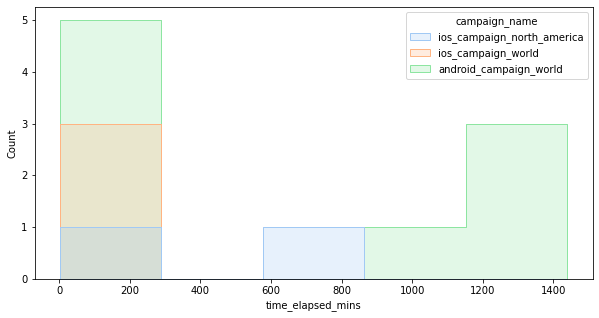

In [1012]:
fig, ax = pyplot.subplots(figsize=(10, 5))
sns.histplot(data=app_installs_and_revenue, x="time_elapsed_mins", hue="campaign_name",  element="step", bins=5)


.

After examining the distribution, I looked for a relationship between the time elapsed and the revenue generated. The top left graph shows that the amount of revenue has a left skew, meaning that the majority of the sales are on the lower end and improvements can be made to generate a higher amount of revenue. The top right shows the same trend as the web campaigns: revenue plateaus (and can decrease slightly) as the time between the install and the purchase increases. The second and final graph shows, again, that the frist 10 minutes are critical in generating high revenue.

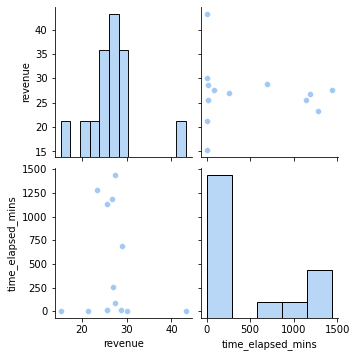

In [1013]:
#first graph
revenue1= app_installs_and_revenue.drop(['sk_user', 'install_timestamp', 'purchased_at',], axis=1)
sns.pairplot(revenue1)

(0.0, 60.0)

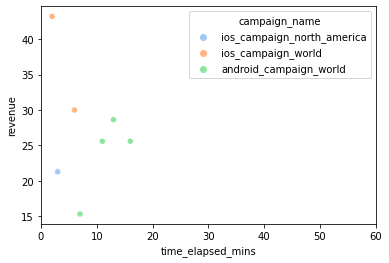

In [1014]:
#second graph
sns.scatterplot(data=revenue1, x="time_elapsed_mins", y="revenue", hue="campaign_name")
plt.xlim(0,60) 

### III. App vs. Web Campaigns 

After deep diving into the specifics within each app and web campaign, I thought a simplification/overview of the general performance of app versus web campaigns would be helpful for a high-level understanding. For simplicity, and to spare you from reading more code, I decided upon only 3 metrics:

1. Number of conversion

2. CAC

3. ROI 




Text(0.5, 1.0, 'App (126703 Installations)')

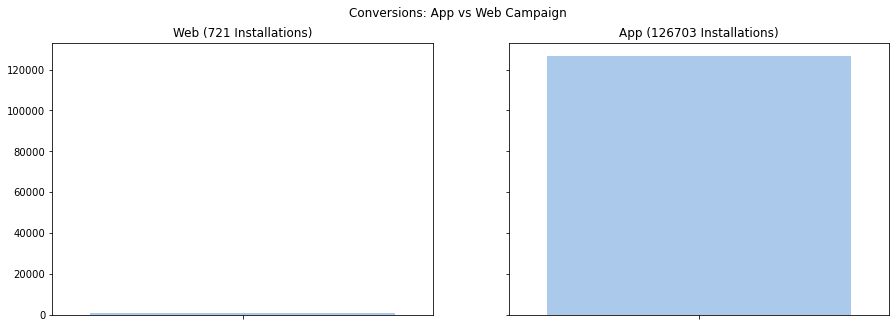

In [1025]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
fig.suptitle('Conversions: App vs Web Campaign')

sns.barplot( y=[campaign_conversion.sk_user.sum()], data=campaign_conversion, ax=axes[0])
sns.barplot( y=[campaign_conversion1.sk_user.sum()], data=campaign_conversion1, ax=axes[1])
        
axes[0].set_title('Web (721 Installations)')
axes[1].set_title('App (126703 Installations)')

The above graphs show that the app campaigns brought in 175 times more installations than the web campaigns. 

.

In terms of cost per action, the web campaigns were more expensive at about 370 euros per app installation versus the app campaigns, which were only about 2 euros an install. 

In [952]:
print('CPA -- cost per action (€ /intall)')
print ('')
print('App Campaigns:', (app_spend.spend.sum())/(campaign_conversion1.sk_user.sum()))
print('Web Campaigns:', (web_spend.spend.sum())/(campaign_conversion.sk_user.sum()))


CPA -- cost per action (€ /intall)

App Campaigns: 2.1082531589622975
Web Campaigns: 370.4882108183079


.

Lastly, I utilized the formula (revenue - cost of campaign)/ (cost of campaign) to calculate the ROI for the app and web campaigns. Based on these calculations, there is room for improvement in both type of campaigns.

In [1037]:
app_roi= (app_installs_and_revenue.revenue.sum()-(app_spend.spend.sum()))/(app_spend.spend.sum())*100
web_roi= (unique_web_users.revenue.sum()-(web_spend.spend.sum()))/(web_spend.spend.sum())*100


print('ROI (%)')
print('')
print ( 'App Campaign:', app_roi)
print('Web Campaign:', web_roi)



ROI (%)

App Campaign: -99.85915424412816
Web Campaign: -94.95288295235885


### IV. K-means Clustering Algorithm for Customer Segmentation

In order to provide you with a better understanding of my capabilities, I decided to highlight a use case of how my machine learning expertise could be used for business intelligence purposes for Asana Rebel. After some research on the analytics provided by Facebook Ads, I learnt that it provides segmented user information, but not entire profiles. For example, it might tell you whether more females or males viewed the add or what geographical location most viewers came from or the most frequent ages of those viewers. However, it does not provide a complete user profile that correlates all the data, such as: Female, American, between the ages of 22-25. That is where machine learning comes in. The K-means clustering algorithm can be used to group users by given characteristics. It looks for similarities amongst the data points and groups them accordingly. This can then be used to see how many different groups and what kind of users responded well to the campaigns. 

Since I did not have access to data about the users, I merely used the variables that I did have in order to demonstrate its potential use. Specifically, the variables I used were revenue and time elapsed during a session from the web campaigns. Since the majority of the code below is the preparation of data and implementation of the algorithm, it can be glazed over. Instead, I would like to direct your attention to the final cell containing the graph. It shows the final result: two main customer profiles responded to the web campaigns. 

Again, the segmentation is more for demonstration purposes, since the variables were improvised and more data is required. But, the potential from the results are numerous. For example, customers in group 1 can be added to a different email list than those from group 2 in order to customize marketing approaches. Additionally, the higher revenue generating group can be added to a VIP loyalty program while the lower revenue generating group can be sent periodic offers to entice them to spend more. 


In [996]:
cluster= web_installs4.drop(['install_timestamp', 'session_started_timestamp'], axis=1)

In [745]:
from sklearn.preprocessing import StandardScaler
import numpy as np

X = cluster.values[:,1:]
X = np.nan_to_num(X)
Clus_dataSet = StandardScaler().fit_transform(X)
df_normalized = pd.DataFrame(Clus_dataSet)
df_normalized.rename(columns={0:'revenue', 1:'time_elapsed'}, inplace=True)
df_normalized

,revenue,time_elapsed
0,-0.220566,-0.675663
1,0.577624,-0.653347
2,-3.668746,-0.681749
3,-3.322455,-0.675663
4,0.216596,-0.679720
...,...,...
756,0.553064,-0.626975
757,-0.525106,-0.641175
758,0.393426,-0.653347
759,0.000471,-0.397736


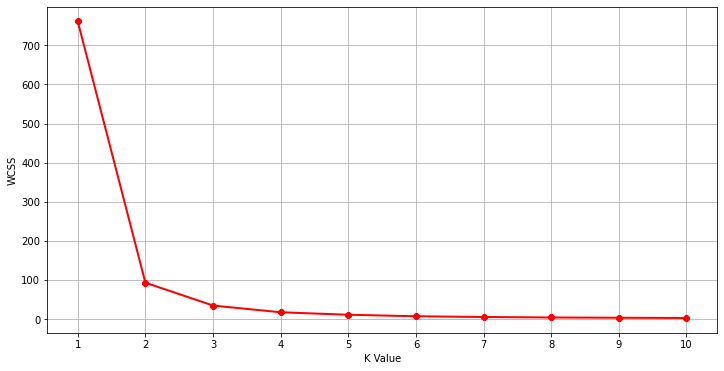

In [707]:
#the "elbow" of the curve is the optimal number of groups, which in this case is 2

from sklearn.cluster import KMeans

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_normalized.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [685]:
clusterNum = 2
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(df_normalized)
labels = k_means.labels_

In [751]:
#can be saved in the data base and added to emailing lists depending on the cluster #
campaign_targets= web_installs4.drop(['revenue', 'time_elapsed_mins','campaign_name', 'install_timestamp', 'session_started_timestamp', 'time_elapsed'], axis=1)
campaign_targets["Cluster Number"] = labels
campaign_targets


,sk_user,Cluster Number
0,5760718740,0
1,5760787444,0
2,5759581305,0
3,5759397241,0
4,83182063,0
...,...,...
756,5760793376,0
757,5760720497,0
758,5761105936,0
759,5750444109,0


Text(0, 0.5, 'Revenue Generated')

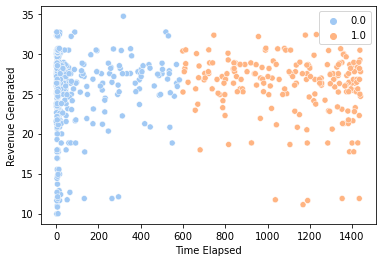

In [763]:
sns.scatterplot(data=web_installs4, x= X[:, 1], y= X[:, 0], hue= labels.astype(np.float))
plt.xlabel("Time Elapsed")
plt.ylabel("Revenue Generated")

### V. Final Recommendations


Congratulations, you have made it to the final section of the report! 

For the finale, I would like to end with a final recommendation to tackle the web campaign attribution difficulties. During my time at Apple, I learnt the term "a warm hand-off". This refered to seamless transitions within the user experience. It means guiding the client throughout his or her process and providing warm hand-offs when changes arise. In this case, a warm hand-off is needed between the web ad and the installation/opening of the app. I believe it can be achieved through the use of deep links, particularly those provided and monitored by Branch.  

After reading about the logic behind the Facebook algorithm monitoring ad links, I learnt that Facebook's aim is to keep users on their app as long as possible. Therefore, in order to do so the default of ad links are set to open as mobile websites that remain within the Facebook app. An ad link only opens in an app if the user already has the app installed; however, for our purposes, this is essentially useless since the people targeted by the campaign will not have the app previously installed.   

However, Branch is a new startup in Silicon Valley, with large clients such as Airbnb and Microsoft, that provides a solution to combat this. They not only direct the user to install the app but also direct them to a specific page within the app once it opens. Branch has developed a technology that detects whether the user has the company app installed, then asks if the user would like to download this app before they enter the mobile web page, then redirects them to the app store page for the particular app, and opens a specefic page (such as the sign up page) once installation is complete. The best part is that it tracks the user throughout the process and analytics for marketing campaigns are also provided, allowing for an accurate understanding of the user journey and correct web campaign attribution. 

You can find more information about it here: https://blog.branch.io/how-to-deep-link-on-facebook/


Lastly, thank you very much for sharing your data with me and having taken the time to read through this analysis. I hope it was helpful and provided some insights into my analytical mindset and data science expertise, as well as the value these can bring to the Asana Rebel team. I welcome any feedback and/or questions.
